In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

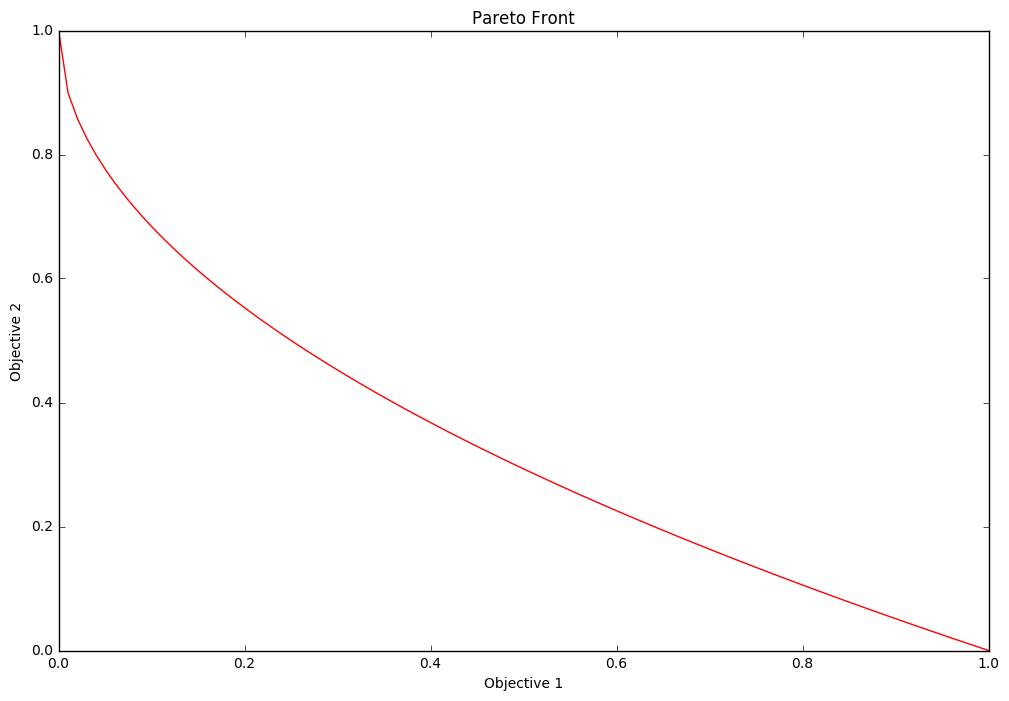

In [2]:
X = np.linspace(0, 1, 100)
Y = 1 - np.sqrt(X)

plt.figure(figsize=(12, 8))
plt.plot(X, Y, 'r-')
plt.xlabel('Objective 1')
plt.ylabel('Objective 2')
plt.title('Pareto Front')
plt.show()

### Wyznaczanie frontu Pareto algorytmem NSGA-II

In [3]:
import sys

sys.path.append('nsga2/')

from metrics.problems.zdt import ZDT1Metrics
from nsga2.evolution import Evolution
from nsga2.problems.zdt import ZDT
from nsga2.problems.zdt.zdt1_definitions import ZDT1Definitions

def print_statistics(population, iteration):
    PF = population.fronts[0]
    metrics = ZDT1Metrics()
    print("Iteration %03d: HV = %0.2f, HVR = %0.2f" % (iteration, metrics.HV(PF), metrics.HVR(PF)))

statistics = []
def log_statistics(population, iteration):
    ranks = [individual.rank for individual in population]
    crowding_distances = [individual.crowding_distance for individual in population]
    objectives = [individual.objectives for individual in population]

    pareto_front = population.fronts[0]
    metrics = ZDT1Metrics()
    hv = metrics.HV(pareto_front)
    hvr = metrics.HVR(pareto_front)

    statistics.append((hv, hvr, ranks, crowding_distances, objectives))

In [4]:
def plot_PF(results):
    PF = np.array([i.objectives for i in results])

    plt.figure(figsize=(12, 8))
    plt.plot(PF[:, 0], PF[:, 1], 'ro')
    plt.xlabel('Objective 1')
    plt.ylabel('Objective 2')
    plt.title('Pareto Front')
    plt.show()

Iteration 000: HV = 78.51, HVR = 0.65
Iteration 001: HV = 80.66, HVR = 0.67
Iteration 002: HV = 81.48, HVR = 0.68
Iteration 003: HV = 82.26, HVR = 0.68
Iteration 004: HV = 83.94, HVR = 0.70
Iteration 005: HV = 84.96, HVR = 0.70
Iteration 006: HV = 85.75, HVR = 0.71
Iteration 007: HV = 87.27, HVR = 0.72
Iteration 008: HV = 86.81, HVR = 0.72
Iteration 009: HV = 88.35, HVR = 0.73
Iteration 010: HV = 89.72, HVR = 0.74
Iteration 011: HV = 90.14, HVR = 0.75
Iteration 012: HV = 90.68, HVR = 0.75
Iteration 013: HV = 91.16, HVR = 0.76
Iteration 014: HV = 92.27, HVR = 0.76
Iteration 015: HV = 93.58, HVR = 0.78
Iteration 016: HV = 93.74, HVR = 0.78
Iteration 017: HV = 94.54, HVR = 0.78
Iteration 018: HV = 95.12, HVR = 0.79
Iteration 019: HV = 96.58, HVR = 0.80
Iteration 020: HV = 96.75, HVR = 0.80
Iteration 021: HV = 97.35, HVR = 0.81
Iteration 022: HV = 97.29, HVR = 0.81
Iteration 023: HV = 97.53, HVR = 0.81
Iteration 024: HV = 98.03, HVR = 0.81
Iteration 025: HV = 99.12, HVR = 0.82
Iteration 02

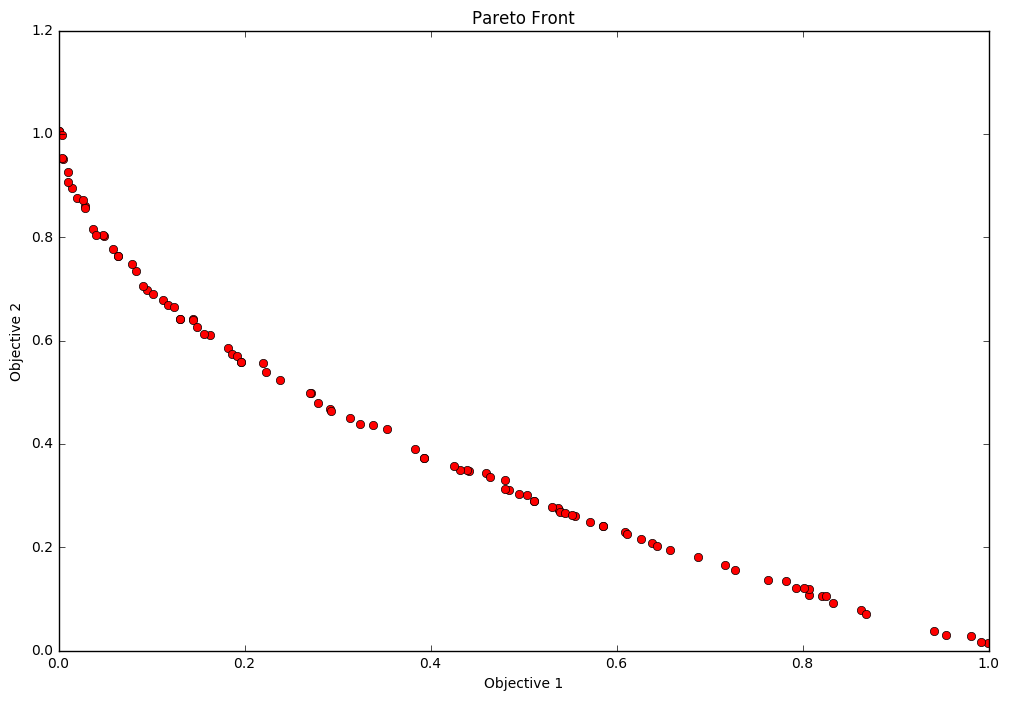

CPU times: user 1min 35s, sys: 8.59 s, total: 1min 43s
Wall time: 1min 29s


In [5]:
%%time

solver = Evolution(ZDT(ZDT1Definitions()), 200, 100)
solver.register_on_new_generation(print_statistics)
solver.register_on_new_generation(log_statistics)
results = solver.evolve()

plot_PF(results)

### Wykres HV i HVR

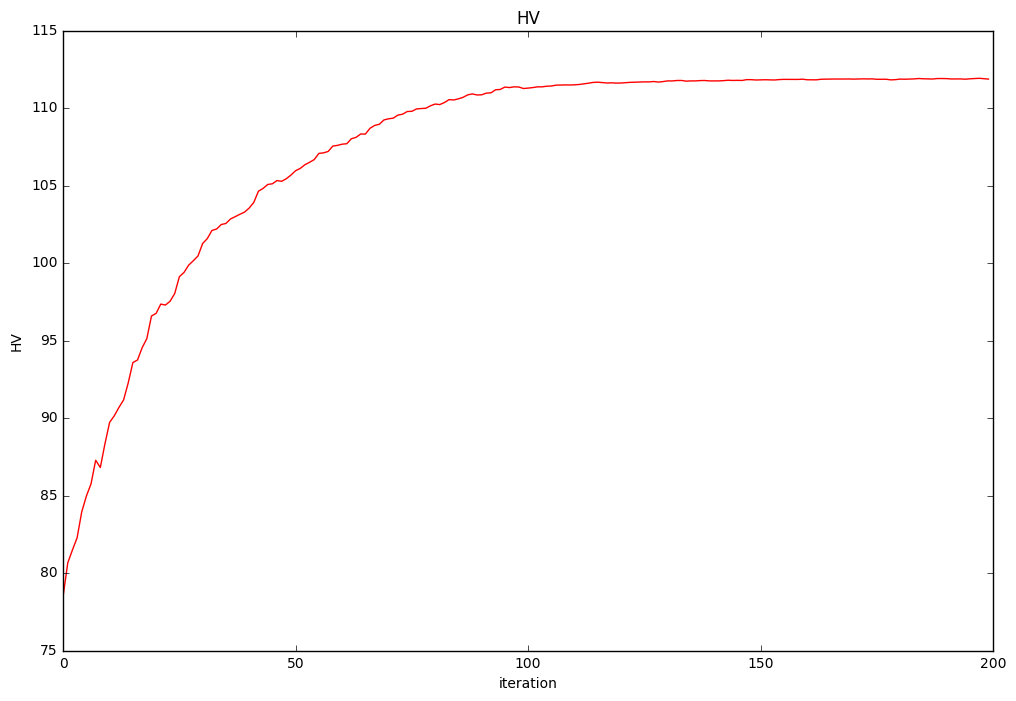

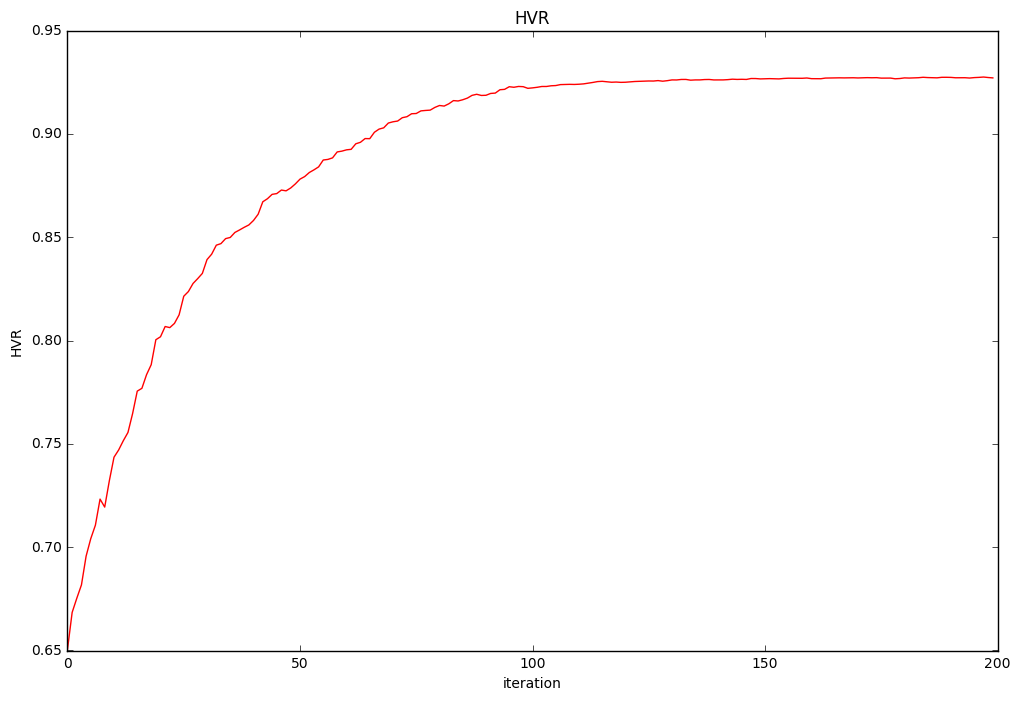

In [6]:
HV = np.array([statistics[i][0] for i in xrange(len(statistics))])
HVR = np.array([statistics[i][1] for i in xrange(len(statistics))])

plt.figure(figsize=(12, 8))
plt.plot(HV, 'r-')
plt.xlabel('iteration')
plt.ylabel('HV')
plt.title('HV')
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(HVR, 'r-')
plt.xlabel('iteration')
plt.ylabel('HVR')
plt.title('HVR')
plt.show()

### Wykres przykładowej populacji (ze wskazanej iteracji)

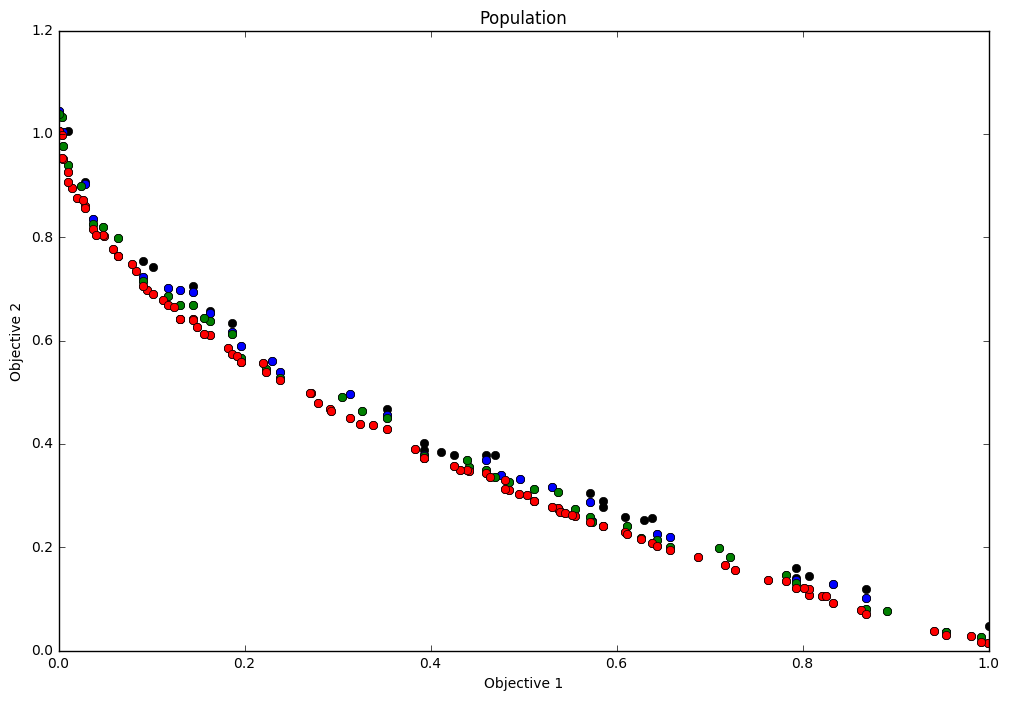

In [7]:
iteration = len(statistics)-1

ranks = np.array(statistics[iteration][2])
objectives = np.array(statistics[iteration][4])

PF0 = (ranks == 0)
PF1 = (ranks == 1)
PF2 = (ranks == 2)

plt.figure(figsize=(12, 8))
plt.plot(objectives[:, 0], objectives[:, 1], 'ko')
plt.plot(objectives[PF2, 0], objectives[PF2, 1], 'bo')
plt.plot(objectives[PF1, 0], objectives[PF1, 1], 'go')
plt.plot(objectives[PF0, 0], objectives[PF0, 1], 'ro')
plt.xlabel('Objective 1')
plt.ylabel('Objective 2')
plt.title('Population')
plt.show()